# Machine Learning Models for Breast Cancer Diagnosis

## Business understanding

Define business problem that needs to be solved.
- What is the goal of the analysis?
- What are the requirements and constraints?
- What is the expected outcome?

Researching:
- How amount of neightbours will affect the results.
- How typical classification errors are and how those stand out (e.g. False positive and False negative ratio).
- How well kNN can distinguish good samples from bad samples.
- How standardization affects results.

Goal: Build a kNN-classifier that can predict a breast cancer diagnosis by using data extracted from FNA-images and also evaluate it's performance (hold-out validation, confusion matrix and accuracy/precision/recall)

Success criteria: 
- 66% prediction accuracy
- Report performance values like confusion matrix, accuracy, precision and recall.

Requirements and constraints:  
- Data consists of 357 benign and 212 malignant, which means that class distribution is uneven

## !!!!!!!!!!!!!!! ^ VAATII KORJAUSTA ^ !!!!!!!!!!!!!!!!

In [1]:
# hello world

## Data understanding

collect and explore the data.
- What data is available? What are the characteristics of the data (variable types, value distributions etc.)?
- Are there any quality issues with the data (missing values, outliers, nonsensical values)?

Data koostuu 569 testatusta potilaasta

Data muodostuu 32:sta attribuutista:
- 1 (ID).
- 1 kohdemuuttuja (Diagnoosi).
- 30 numeerista muuttujaa.

Kohdemuuttujat:
- B (Benign)
- M (Malignant)

Piirteet jota mitataan (numeerisia):
- Radius – etäisyys ytimen keskipisteestä kehälle
- Texture – harmaasävyarvojen vaihtelu
- Perimeter – ytimen kehän pituus
- Area – ytimen pinta-ala
- Smoothness – reunan tasaisuus (pienet vaihtelut säteessä)
- Compactness – laskettu suhde (perimeter² / area − 1)
- Concavity – kuinka syviä kuoppia reuna sisältää
- Concave points – kuoppien määrä
- Symmetry – ytimen symmetria
- Fractal dimension – “rannikkoviiva”-arvio, monimutkaisuusmitta

Jokaisesta piirteestä kolme arvoa:
- Mean (Keskimääräinen arvo)
- SE / Standard error (keskihajonnan arvio)
- Worst (Kolmen huonoimman arvon keskiarvo)

In [2]:
# hello world

## Data preparation

data preprocessing
- cleaning the data
- transforming the data
- selecting the relevant features

In [3]:
import numpy as np
import pandas as pd

# 10 perusominaisuutta
features = [
    "radius",
    "texture",
    "perimeter",
    "area",
    "smoothness",
    "compactness",
    "concavity",
    "concave_points",
    "symmetry",
    "fractal_dimension"
]

# Jokaisesta lasketut kolme versiota
suffixes = ["mean", "se", "worst"]

columns = ["ID", "Diagnosis"]
for suffix in suffixes:
    for feature in features:
        columns.append(f"{feature}_{suffix}")

df = pd.read_csv("./breastCancerData/wdbc.data", header=None, names=columns)
df.head()


,ID,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
#Diagnosis from object to category
df["Diagnosis"] = df["Diagnosis"].astype("category")
df.dtypes

ID                            int64
Diagnosis                  category
radius_mean                 float64
texture_mean                float64
perimeter_mean              float64
area_mean                   float64
smoothness_mean             float64
compactness_mean            float64
concavity_mean              float64
concave_points_mean         float64
symmetry_mean               float64
fractal_dimension_mean      float64
radius_se                   float64
texture_se                  float64
perimeter_se                float64
area_se                     float64
smoothness_se               float64
compactness_se              float64
concavity_se                float64
concave_points_se           float64
symmetry_se                 float64
fractal_dimension_se        float64
radius_worst                float64
texture_worst               float64
perimeter_worst             float64
area_worst                  float64
smoothness_worst            float64
compactness_worst           

In [5]:
#Todetaan että data ei ole puutteellinen
print(df.isnull().sum())

ID                         0
Diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [6]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['ID', 'Diagnosis']) #inputs
y = df['Diagnosis'].map({'B': 0, 'M': 1}) #targets

#Jaetaan koulutussettiin ja testaussettiin
#70% koulutus ja 30% testi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify = y)

## Modeling

choose a machine learning method and train the model (+ model validation)
- which method was used?
- which parameters were used?
- what was the performance of the model?

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # initalizing standard scaler
X_train_scaled = scaler.fit_transform(X_train) #Scaling train inputs
X_test_scaled = scaler.fit_transform(X_test) #Scaling test inputs

In [10]:
from sklearn.neighbors import KNeighborsClassifier

kNN = KNeighborsClassifier(n_neighbors = 3) # kannattaa testata myös 5 tai 7
kNN.fit(X_train_scaled, y_train) # builds the classifier

KNeighborsClassifier(n_neighbors=3)

Accuracy: 0.9590643274853801
Precision: 0.9830508474576272
Recall: 0.90625


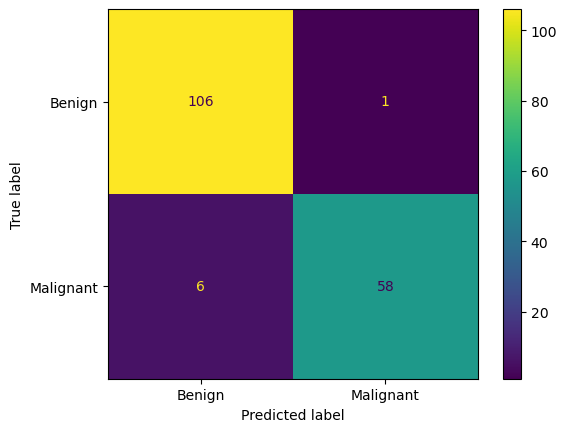

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay

y_pred = kNN.predict(X_test_scaled) #Predicting Diagnosis
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Benign', 'Malignant'])

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
cmd.plot()

## Evaluation

evaluate the model
- How well does the model perform?
- Does it meet the business requirements?

In [ ]:
# hell world

## Deployment

johtopaatos / creating a recommendation of how to use the model in practice, or what to do next
- How will the model be used in practice?
- How will the results be communicated?

In [ ]:
# hello world

### Reflection

#### Ai Usage
- for research

#### Team contribution
- who did what

#### Sources
- links & descriptions